In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.cluster import KMeans
filterwarnings("ignore")

##### reading lena image and splitting into R, G and B channels

In [4]:
lena = cv2.imread("images/Lena.bmp")
b_lena, g_lena, r_lena = cv2.split(lena)
b_lena = b_lena.astype(np.double)
g_lena = g_lena.astype(np.double)
r_lena = r_lena.astype(np.double)

## 1.1.1

##### Calculating H, S and V

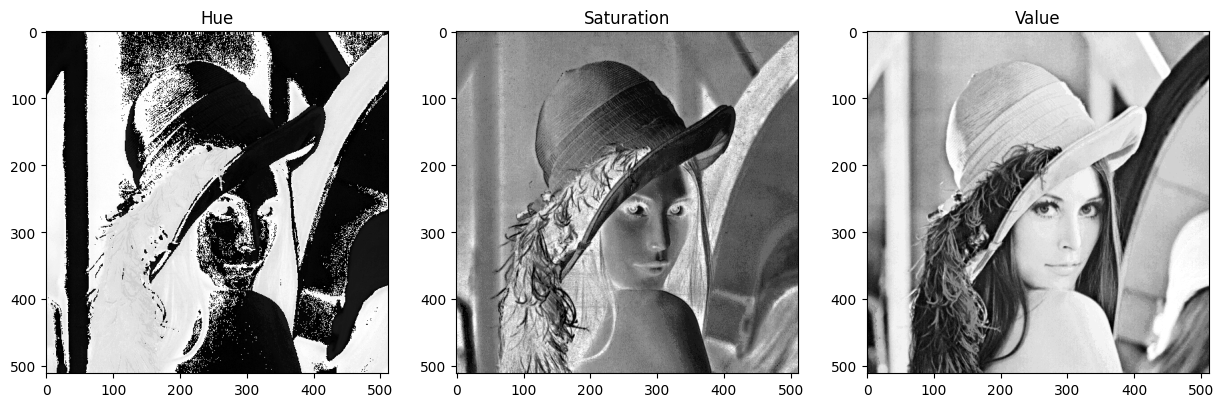

In [18]:
def calculate_HSV(r, g, b):
    width, height = r.shape
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    for i in range(width):
        for j in range(height):
            M = max(r[i, j], g[i, j], b[i, j])
            m = min(r[i, j], g[i, j], b[i, j])
            c = M - m
            # print(c)
            v[i, j] = M
            s[i, j] = (c / v[i, j])
                
            if M == r[i, j] and c != 0:
                h[i, j] = (((g[i, j] - b[i, j]) / c) % 6) * 60
            elif M == g[i, j] and c != 0:
                h[i, j] = (((b[i, j] - r[i, j]) / c) + 2) * 60
            elif M == b[i, j] and c != 0:
                h[i, j] = (((r[i, j] - g[i, j]) / c) + 4) * 60
            elif c == 0:
                h[i, j] = 0
    return h, s, v
h, s, v = calculate_HSV(r_lena, g_lena, b_lena)
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
axis[0].imshow(h, cmap="gray")
axis[0].set_title("Hue")
axis[1].imshow(s, cmap="gray")
axis[1].set_title("Saturation")
axis[2].imshow(v, cmap="gray")
axis[2].set_title("Value")
# plt.imshow(v, cmap="gray")
plt.show()

## 1.1.2

##### YIQ color space

- Y: represents brightness
- I and Q: represent chromaticity

- Y = 0.299R + 0.587G + 0.114B
- I = 0.596R - 0.274G - 0.322B
- Q = 0.211R - 0.523G + 0.312*B

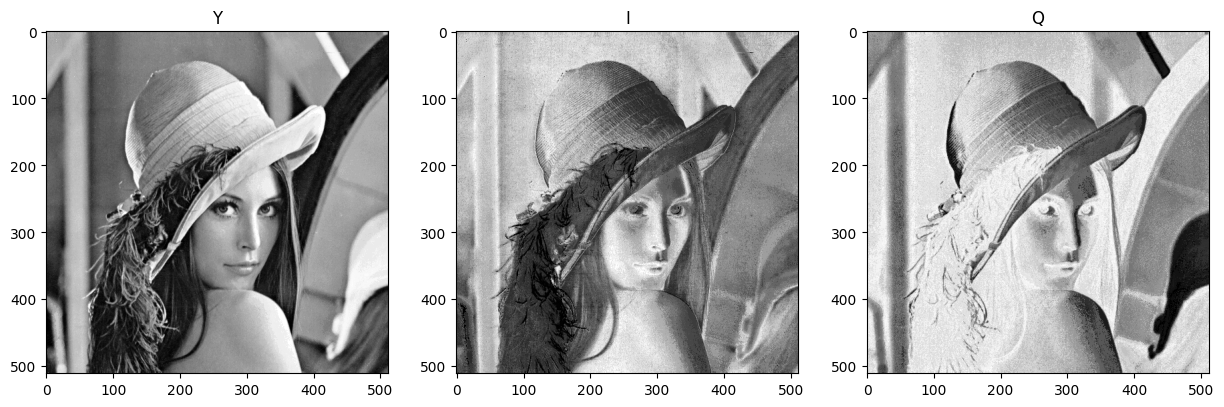

In [20]:
# calculatin Y, I and Q for lena

y_lena = 0.299 * r_lena + 0.58 * g_lena + 0.114 * b_lena
i_lena = 0.596 * r_lena - 0.274 * g_lena - 0.322 * b_lena
q_lena = 0.211 * r_lena - 0.523 * g_lena + 0.312 * b_lena
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
axis[0].imshow(y_lena, cmap="gray")
axis[0].set_title("Y")
axis[1].imshow(i_lena, cmap="gray")
axis[1].set_title("I")
axis[2].imshow(q_lena, cmap="gray")
axis[2].set_title("Q")
# plt.imshow(v, cmap="gray")
plt.show()

- r = y + 0.956*i + 0.621*q
- g = y - 0.272*i - 0.647*q
- b = y - 1.106*i + 1.703*q

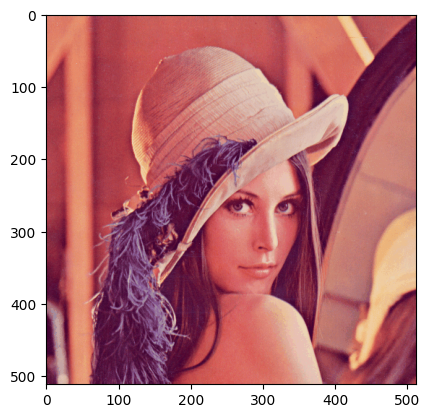

In [21]:
# returning to RGB

r = y_lena + 0.956*i_lena + 0.621*q_lena
g = y_lena - 0.272*i_lena - 0.647*q_lena
b = y_lena - 1.106*i_lena + 1.703*q_lena

img = np.stack((r, g, b), axis=2)
img = img.astype(np.uint8)
plt.imshow(img)
plt.show()


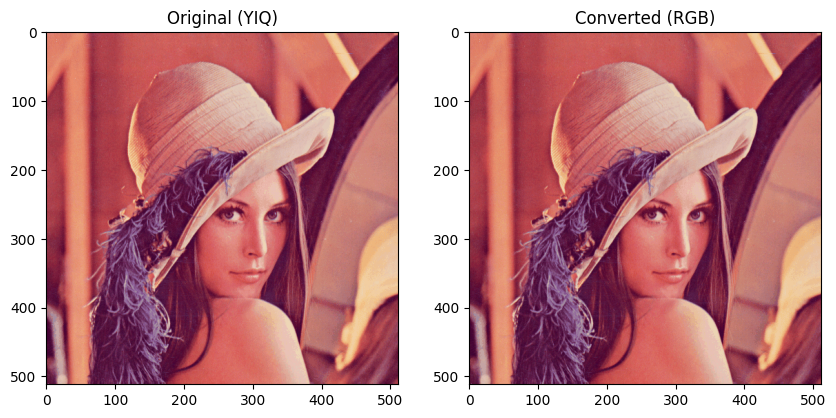

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image in YIQ color space
img_yiq = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# Split the image into Y, I, Q channels
y, i, q = (y_lena, i_lena, q_lena)

# Convert the YIQ channels to RGB channels
r = y + 0.956*i + 0.621*q
g = y - 0.272*i - 0.647*q
b = y - 1.106*i + 1.703*q

# Merge the RGB channels back into a single image
img_rgb = np.stack([r, g, b], axis=2)
img_rgb = img_rgb.astype(np.uint8)
# Display the original YIQ image and the converted RGB image side by side using pyplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_yiq)
axs[0].set_title('Original (YIQ)')
axs[1].imshow(img_rgb)
axs[1].set_title('Converted (RGB)')
plt.show()

### 1.2.1

In [2]:
# loading baboon image

baboon = cv2.imread("images/Baboon.bmp")
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
baboon.shape

(512, 512, 3)

##### 32 colors

In [25]:
# converting (512, 512, 3) image to (262144, 3) array

data_set = np.reshape(baboon, (262144, 3))

kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=32, random_state=42)

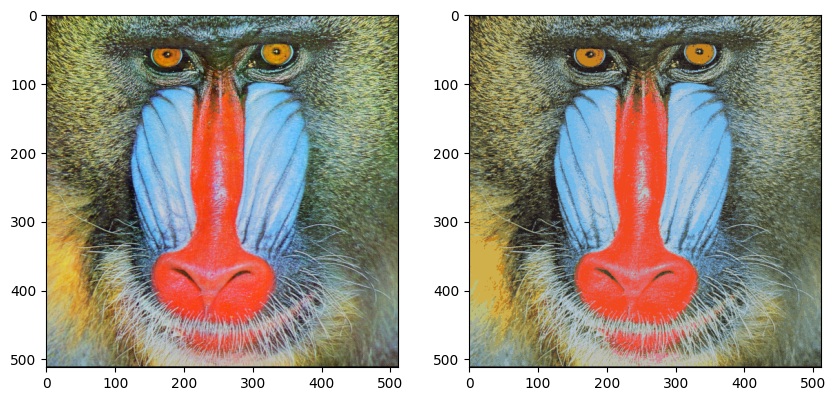

In [26]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 16 colors

In [28]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=16, random_state=42)

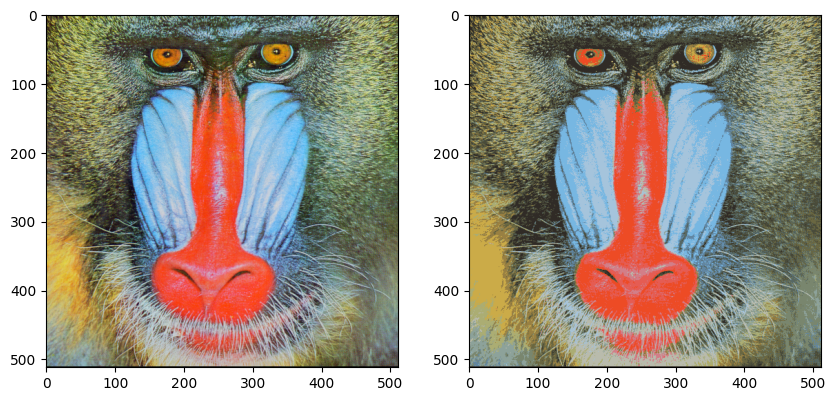

In [29]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 8 colors

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_set)

KMeans(random_state=42)

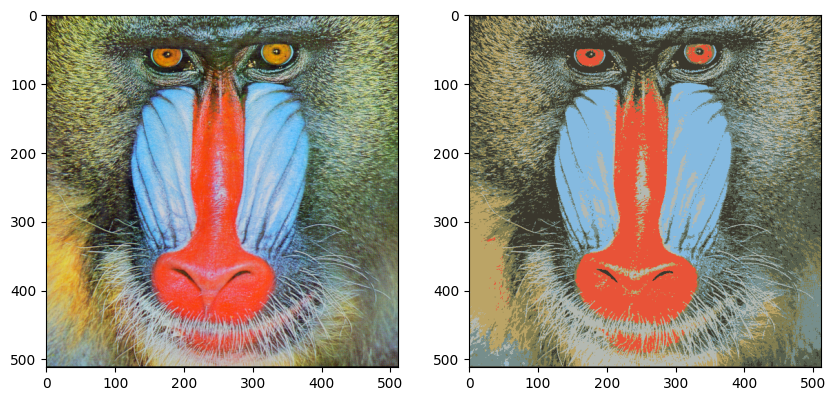

In [31]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

### 2.1.1

In [6]:
def harris(image, window_size=7, threshold=0.1):
    Ix, Iy = np.gradient(image)
    
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy

    Sxx = cv2.boxFilter(Ix2, -1, (window_size, window_size))
    Syy = cv2.boxFilter(Iy2, -1, (window_size, window_size))
    Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

    det = Sxx * Syy - Sxy ** 2
    trace = Sxx + Syy

    harris_response = det - 0.04 * trace ** 2
    corners = np.where(harris_response > threshold * harris_response.max())
    return corners

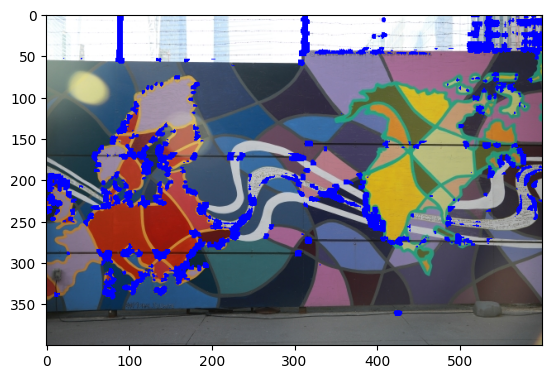

In [5]:
import cv2
import numpy as np

# Load an image
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/harris.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Define the window size for the Harris corner detector
window_size = 7

# Define the threshold for corner detection
threshold = 0.01

# Define the parameters for the Sobel operator
ksize = 3
dx = 1
dy = 1

# Compute the horizontal and vertical gradients using the Sobel operator
# Ix = cv2.Sobel(img, cv2.CV_64F, dx, 0, ksize)
# Iy = cv2.Sobel(img, cv2.CV_64F, 0, dy, ksize)
Ix, Iy = np.gradient(img)

# Compute the elements of the structure tensor
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# Compute the sums of the structure tensor elements over the window
Sxx = cv2.boxFilter(Ix2, -1, (window_size, window_size))
Syy = cv2.boxFilter(Iy2, -1, (window_size, window_size))
Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

# Compute the determinant and trace of the structure tensor
det = Sxx * Syy - Sxy ** 2
trace = Sxx + Syy

# Compute the Harris response
harris_response = det - 0.04 * trace ** 2

# Threshold the Harris response to obtain the corner points
corners = np.where(harris_response > threshold * harris_response.max())

# Display the corners on the original image
img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img2[corners] = [0, 0, 255]


plt.imshow(img2)
plt.show()

In [ ]:
import cv2
import numpy as np

# Read the input image
img = cv2.imread('images/harris.JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=7, ksize=3, k=0.04)

# Threshold the resulting image
dst[dst < 0.01 * dst.max()] = 0

# Display the result
img[dst != 0] = [0, 0, 255]
cv2.imshow('Harris Corners', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
import numpy as np
import cv2

# Load the image
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)

# Compute the Roberts cross derivatives
Ix = cv2.filter2D(img, -1, np.array([[-1, 0], [0, 1]]))
Iy = cv2.filter2D(img, -1, np.array([[0, -1], [1, 0]]))

# Compute the elements of the structure tensor
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)
Ixy = np.multiply(Ix, Iy)

# Compute the sum of the elements in a local neighborhood
kernel_size = 3
Sx2 = cv2.filter2D(Ix2, -1, np.ones((kernel_size, kernel_size)))
Sy2 = cv2.filter2D(Iy2, -1, np.ones((kernel_size, kernel_size)))
Sxy = cv2.filter2D(Ixy, -1, np.ones((kernel_size, kernel_size)))

# Compute the corner response function
k = 0.06
R = (Sx2 * Sy2 - Sxy ** 2) - k * (Sx2 + Sy2) ** 2

# Threshold the corner response function
threshold = 0.5 * np.max(R)
corner_map = np.zeros_like(img)
corner_map[R > threshold] = 255

# Display the corners in the image
cv2.imshow('Corners', corner_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2

# Read the input image
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)

# Compute the gradient in the x and y directions
grad_x, grad_y = np.gradient(img)

# Display the gradients
cv2.imshow('Gradient X', grad_x ** 2)
cv2.imshow('Gradient Y', grad_y ** 2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2

# Load images
img1 = cv2.imread('images/sl.jpg')
img2 = cv2.imread('images/sm.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT object
sift = cv2.SIFT_create()

# Detect and compute key-points and descriptors for both images
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Match descriptors between the two images using a brute-force matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to eliminate false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matched key-points on the images
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Matches', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: index expected at least 1 argument, got 0

In [24]:
import cv2

# Load images
img1 = cv2.imread('images/sl.jpg')
img2 = cv2.imread('images/sm.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT object
sift = cv2.Simport cv2

# Load the images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

# Create SURF object
surf = cv2.xfeatures2d.SURF_create(400)

# Detect keypoints and extract descriptors
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

# Feature matching using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.match(des1, des2)

# Apply ratio test to select good matches
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:100]

# Find homography matrix
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the second image using homography matrix
stitched_img = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

# Overlay the warped image on top of the first image
stitched_img[0:img1.shape[0], 0:img1.shape[1]] = img1

# Show the stitched image
cv2.imshow('Stitched Image', stitched_img)
cv2.waitKey(0)

# Detect and compute key-points and descriptors for both images
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Match descriptors between the two images using a brute-force matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to eliminate false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Get the position of matched points in both images
pts1 = []
pts2 = []
for match in good_matches:
    pts1.append(kp1[match.queryIdx].pt)
    pts2.append(kp2[match.trainIdx].pt)

# Display the matched key-points as a visual output
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Matches', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the position of matched points in both images
print('Number of matches:', len(good_matches))
for i, (pt1, pt2) in enumerate(zip(pts1, pts2)):
    print('Match %d: (%d, %d) in Image 1 matches (%d, %d) in Image 2' % (i+1, pt1[0], pt1[1], pt2[0], pt2[1]))
print(np.array(pts1).astype(np.uint32)[1], np.array(pts2).astype(np.uint32)[1])
print(img1.shape)

Number of matches: 605
Match 1: (13, 176) in Image 1 matches (36, 170) in Image 2
Match 2: (34, 97) in Image 1 matches (523, 246) in Image 2
Match 3: (46, 216) in Image 1 matches (277, 298) in Image 2
Match 4: (89, 93) in Image 1 matches (158, 175) in Image 2
Match 5: (89, 180) in Image 1 matches (16, 172) in Image 2
Match 6: (104, 183) in Image 1 matches (541, 250) in Image 2
Match 7: (153, 80) in Image 1 matches (9, 55) in Image 2
Match 8: (154, 139) in Image 1 matches (8, 123) in Image 2
Match 9: (156, 60) in Image 1 matches (13, 31) in Image 2
Match 10: (156, 81) in Image 1 matches (13, 57) in Image 2
Match 11: (156, 203) in Image 1 matches (6, 196) in Image 2
Match 12: (156, 208) in Image 1 matches (6, 202) in Image 2
Match 13: (158, 45) in Image 1 matches (17, 15) in Image 2
Match 14: (158, 41) in Image 1 matches (17, 10) in Image 2
Match 15: (158, 41) in Image 1 matches (17, 10) in Image 2
Match 16: (159, 75) in Image 1 matches (18, 50) in Image 2
Match 17: (160, 75) in Image 1 

In [6]:
import cv2
import numpy as np

def calculate_mse(matched_keypoints):
    num_matches = len(matched_keypoints)

    # Calculate the squared Euclidean distance for each matched keypoint
    squared_distances = []
    for match in matched_keypoints:
        img1_x, img1_y = match[0].pt
        img2_x, img2_y = match[1].pt
        squared_distance = (img1_x - img2_x) ** 2 + (img1_y - img2_y) ** 2
        squared_distances.append(squared_distance)

    # Calculate the mean squared error (MSE)
    mse = np.mean(squared_distances)

    return mse

# Example usage
image1_path = "images/sl.jpg"
image2_path = "images/sm.jpg"

# Load the images
img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Create a feature detector and descriptor extractor
detector = cv2.SIFT_create()
matcher = cv2.BFMatcher()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)

# Match keypoints
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append((keypoints1[m.queryIdx], keypoints2[m.trainIdx]))

# Calculate MSE
mse = calculate_mse(good_matches)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 18135.800216343625


In [3]:
import cv2
import numpy as np

def stitch_images(image1, image2):
    # Step 1: Load the images
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)
    # Step 2: Detect SIFT keypoints and compute descriptors
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Step 3: Match keypoints using a FLANN-based matcher
    matcher = cv2.FlannBasedMatcher_create()
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

    # Step 4: Apply the ratio test to filter out ambiguous matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Step 5: Estimate the homography matrix
    if len(good_matches) > 10:
        src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

        # Step 6: Warp the images
        warped_image = cv2.warpPerspective(img2, homography, (img1.shape[1] + img2.shape[1], img1.shape[0]))
        warped_image[0:img2.shape[0], 0:img2.shape[1]] = img1

        return warped_image

    else:
        print("Insufficient matches found.")
        return None

# Example usage
image1_path = "images/sl.jpg"
image2_path = "images/sm.jpg"
result = stitch_images(image1_path, image2_path)

if result is not None:
    cv2.imshow("Stitched Image", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [2]:
import cv2

def stitch_images(image1, image2):
    # Load the images
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    # Create a Stitcher object
    stitcher = cv2.Stitcher_create()

    # Stitch the images
    status, stitched_image = stitcher.stitch([img1, img2])

    if status == cv2.Stitcher_OK:
        return stitched_image
    else:
        print("Image stitching failed.")
        return None

# Example usage
image1_path = "images/sl.jpg"
image2_path = "images/sm.jpg"
result = stitch_images(image1_path, image2_path)

if result is not None:
    cv2.imshow("Stitched Image", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

def stitch_images(image1, image2):
    # Step 1: Load the images
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    # Step 2: Detect SIFT keypoints and compute descriptors
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Step 3: Match keypoints using a FLANN-based matcher
    matcher = cv2.FlannBasedMatcher_create()
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

    # Step 4: Apply the ratio test to filter out ambiguous matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Step 5: Find the transformation matrix using RANSAC
    if len(good_matches) > 10:
        src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        M, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

        # Step 6: Warp the second image
        result = cv2.warpPerspective(img2, M, (img2.shape[1], img2.shape[0]))
        # result[0:img1.shape[0], 0:img1.shape[1]] = img1

        # Step 7: Crop the black borders
        # gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        # _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
        # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # cnt = max(contours, key=cv2.contourArea)
        # x, y, w, h = cv2.boundingRect(cnt)
        # result = result[y:y+h, x:x+w]

        return result

    else:
        print("Insufficient matches found.")
        return None

# Example usage
image1_path = "images/sl.jpg"
image2_path = "images/sm.jpg"
result = stitch_images(image1_path, image2_path)

if result is not None:
    cv2.imshow("Stitched Image", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

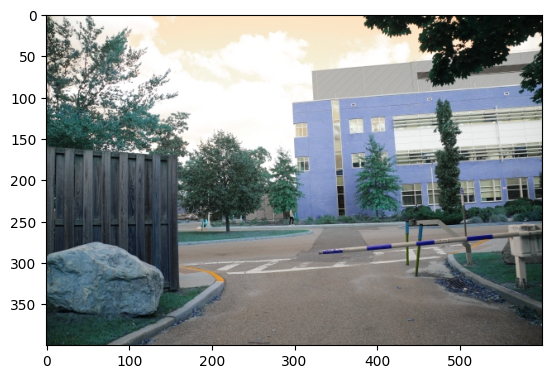

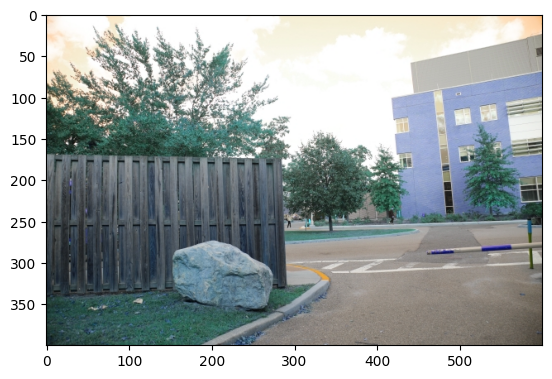

In [2]:
img_1 = cv2.imread('images/sm.jpg')
plt.imshow(img_1)
plt.show()
img_2 = cv2.imread('images/sl.jpg')
plt.imshow(img_2)
plt.show()

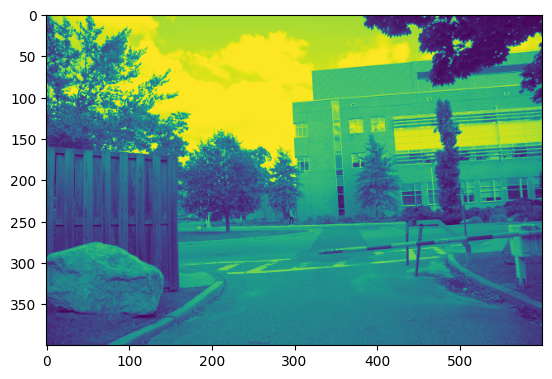

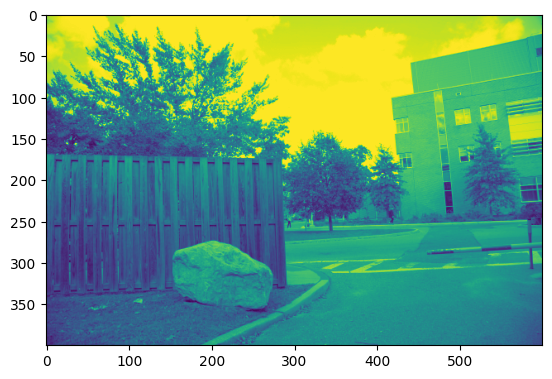

In [3]:
img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()
img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

In [4]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [5]:
bf = cv2.BFMatcher()

In [6]:
matches = bf.knnMatch(des1,des2, k=2)

In [7]:
good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)

In [8]:
if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

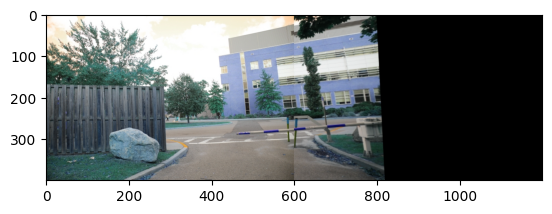

In [9]:
dst = cv2.warpPerspective(img_1,H,((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()

In [ ]:
import cv2

def crop_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)

    # Find the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Crop the image based on the bounding rectangle
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

# Example usage
stitched_image = cv2.imread("output.jpg")

# Crop the stitched image to remove extra parts
cropped_image = crop_image(stitched_image)

# Display the cropped image
cv2.imshow("Cropped Image", cropped_image[:, 0:cropped_image.shape[1] - 40])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2

# Load the images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')x

# Create SURF object
surf = cv2.x

# Detect keypoints and extract descriptors
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

# Feature matching using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.match(des1, des2)

# Apply ratio test to select good matches
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:100]

# Find homography matrix
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the second image using homography matrix
stitched_img = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

# Overlay the warped image on top of the first image
stitched_img[0:img1.shape[0], 0:img1.shape[1]] = img1

# Show the stitched image
cv2.imshow('Stitched Image', stitched_img)
cv2.waitKey(0)

[ WARN:0@335.732] global loadsave.cpp:244 findDecoder imread_('image1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@335.733] global loadsave.cpp:244 findDecoder imread_('image2.jpg'): can't open/read file: check file path/integrity


AttributeError: module 'cv2' has no attribute 'SURF_create'

In [1]:
import cv2

# Load the images
img1 = cv2.imread('images/sm.jpg')
img2 = cv2.imread('images/sl.jpg')

# Create SURF object
surf = cv2.xfeaturesx2d.SURF_create(400)

# Detect keypoints and extract descriptors
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

# Feature matching using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.match(des1, des2)

# Apply ratio test to select good matches
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:100]

# Find homography matrix
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the second image using homography matrix
stitched_img = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

# Overlay the warped image on top of the first image
stitched_img[0:img1.shape[0], 0:img1.shape[1]] = img1

# Show the stitched image
cv2.imshow('Stitched Image', stitched_img)
cv2.waitKey(0)

error: OpenCV(4.7.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
